# Imports

In [ ]:
import numpy as np
import pandas as pd
import geopandas as gpd
import libpysal.weights as weights
import pysal.explore as esda
import matplotlib.pyplot as plt
import seaborn as sns
from utils.db_utils import engine

c:\Users\Natha\Dev\greenspace\.venv\Lib\site-packages\spaghetti\network.py:41: FutureWarning: The next major release of pysal/spaghetti (2.0.0) will drop support for all ``libpysal.cg`` geometries. This change is a first step in refactoring ``spaghetti`` that is expected to result in dramatically reduced runtimes for network instantiation and operations. Users currently requiring network and point pattern input as ``libpysal.cg`` geometries should prepare for this simply by converting to ``shapely`` geometries.
  warnings.warn(dep_msg, FutureWarning, stacklevel=1)
c:\Users\Natha\Dev\greenspace\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Load data

In [4]:
raw_df = gpd.read_postgis("SELECT * FROM combined_data", engine, "geometry")

In [5]:
df = raw_df.copy()

# Define outliers

In [6]:
def calculate_outliers(df, col):
    q1 = np.quantile(df[col], 0.25)
    q3 = np.quantile(df[col], 0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = df[col][(df[col] <= lower_bound) | (df[col] >= upper_bound)]
    return outliers

# Health

## Calculate outliers

In [7]:
vg_outliers = calculate_outliers(df, "very_good_health")
print(len(vg_outliers))

142


## Plot outliers

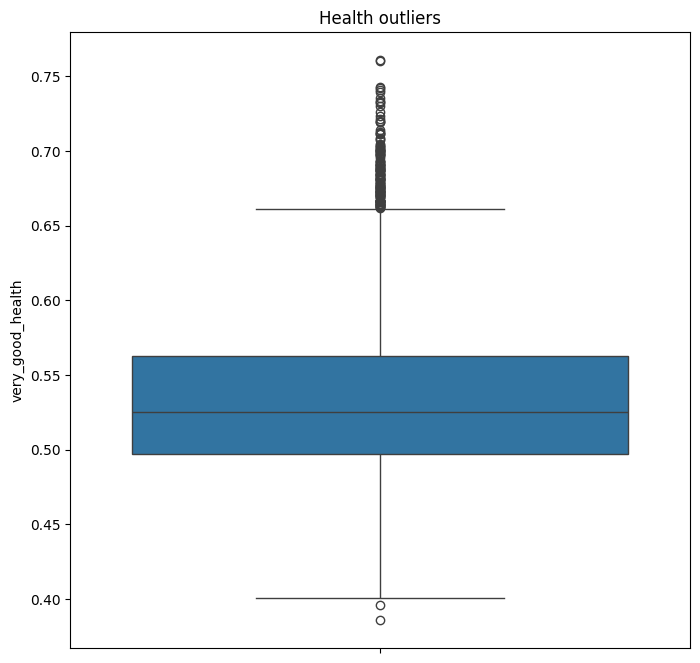

In [8]:
plt.figure(figsize=(8, 8))
sns.boxplot(y=df["very_good_health"])
plt.title("Health outliers")
plt.savefig("outputs/plots/health_outliers.png")

## Plot distribution

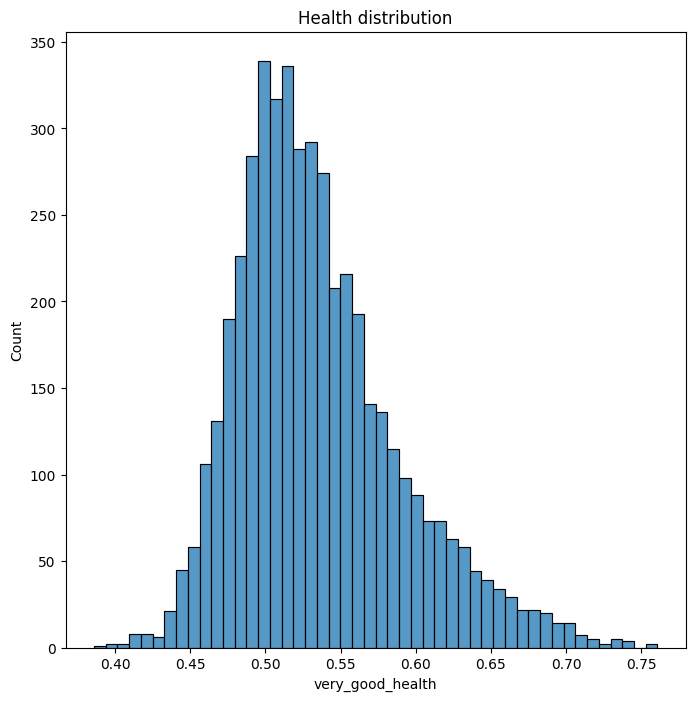

In [9]:
plt.figure(figsize=(8, 8))
sns.histplot(df["very_good_health"])
plt.title("Health distribution")
plt.savefig("outputs/plots/health_distribution.png")

# Greenspace

## Calculate outliers

In [10]:
gp_outliers = calculate_outliers(df, "greenspace_proportion")
print(len(gp_outliers))

304


## Plot outliers

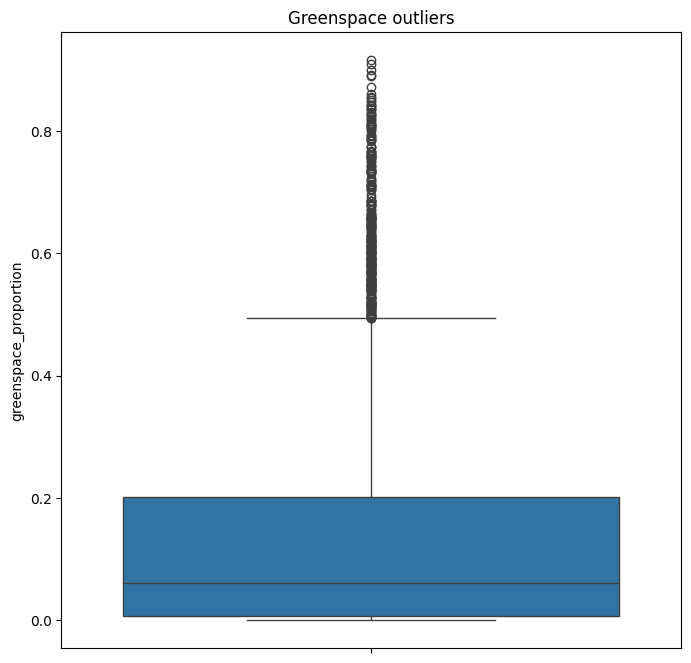

In [11]:
plt.figure(figsize=(8, 8))
sns.boxplot(df["greenspace_proportion"])
plt.title("Greenspace outliers")
plt.savefig("outputs/plots/greenspace_outliers.png")

## Plot distribution

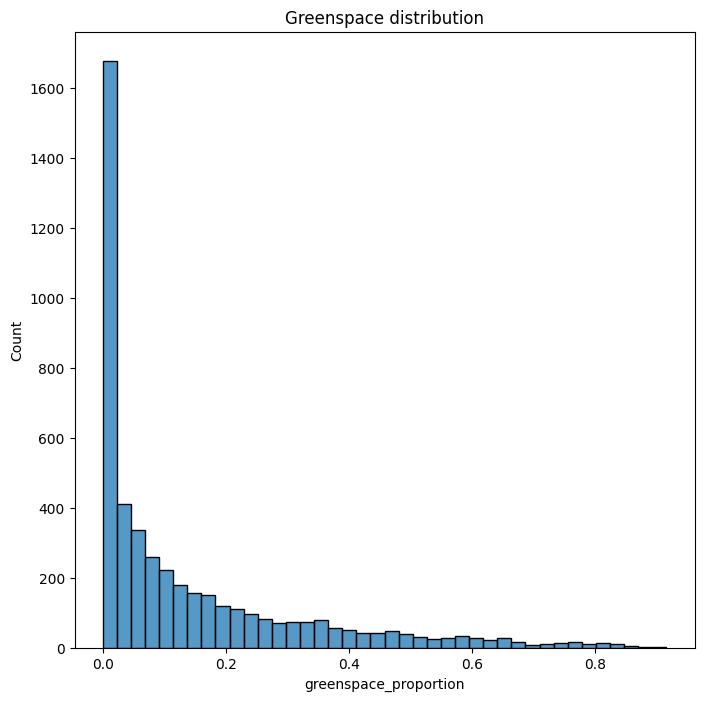

In [12]:
plt.figure(figsize=(8, 8))
sns.histplot(df["greenspace_proportion"])
plt.title("Greenspace distribution")
plt.savefig("outputs/plots/greenspace_distribution.png")

# Spatial autocorrelation

## Calculate Moran's I

In [13]:
w = weights.KNN.from_dataframe(df, k=8)
moran = esda.esda.Moran(df["very_good_health"], w)

In [14]:
print(round(moran.I, 6))

0.562336


## Plots Moran's I

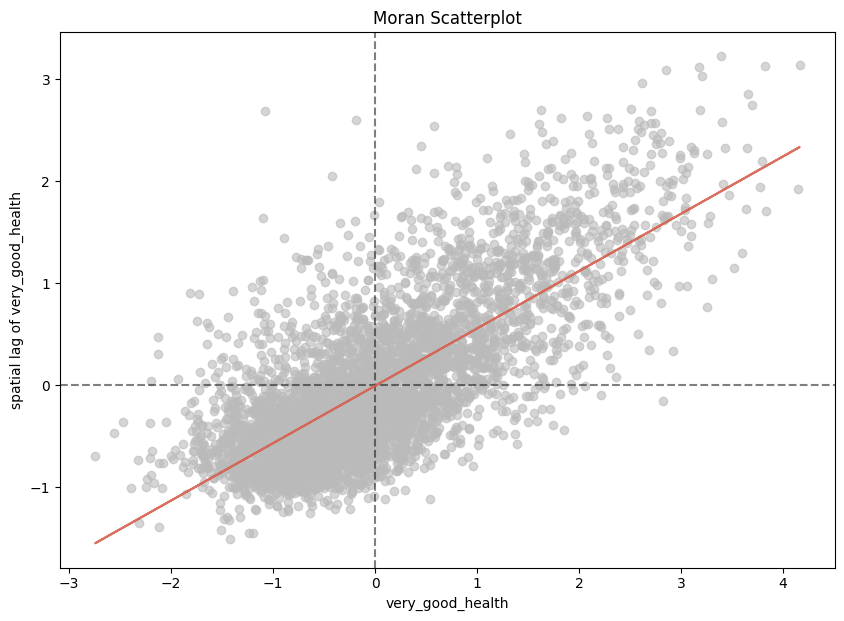

In [15]:
moran_axes = moran.plot_scatter()
moran_axes.set_xlabel("very_good_health")
moran_axes.set_ylabel("spatial lag of very_good_health")
moran_plt = moran_axes.get_figure()
moran_plt.set_figwidth(10)
moran_plt.set_figheight(10)
moran_plt.savefig("outputs/plots/moran.png")